In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned data
data = pd.read_csv('cleaned_ecommerce_data.csv')
data.describe()


,OrderID,CustomerID,ProductID,Quantity,Price,ReturnID,Return_Flag
count,102.000000,102.000000,102.000000,102.000000,102.000000,73.000000,102.000000
mean,1049.058824,2050.490196,3048.813725,2.098039,265.557941,5027.821918,0.715686
std,29.939815,30.983466,27.092701,0.826657,131.538143,14.986422,0.453315
min,1001.000000,2001.000000,3003.000000,1.000000,34.470000,5001.000000,0.000000
25%,1020.250000,2022.000000,3026.000000,1.000000,162.772500,5015.000000,0.000000
50%,1048.500000,2054.500000,3047.000000,2.000000,263.980000,5028.000000,1.000000
75%,1076.500000,2080.000000,3072.000000,3.000000,381.970000,5041.000000,1.000000
max,1100.000000,2099.000000,3100.000000,3.000000,488.130000,5050.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         102 non-null    int64  
 1   CustomerID      102 non-null    int64  
 2   ProductID       102 non-null    int64  
 3   OrderDate       102 non-null    object 
 4   Region          102 non-null    object 
 5   Quantity        102 non-null    int64  
 6   Price           102 non-null    float64
 7   DeliveryStatus  102 non-null    object 
 8   ReturnID        73 non-null     float64
 9   ReturnReason    102 non-null    object 
 10  ReturnDate      73 non-null     object 
 11  CustomerType    102 non-null    object 
 12  Location        102 non-null    object 
 13  Return_Flag     102 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 11.3+ KB


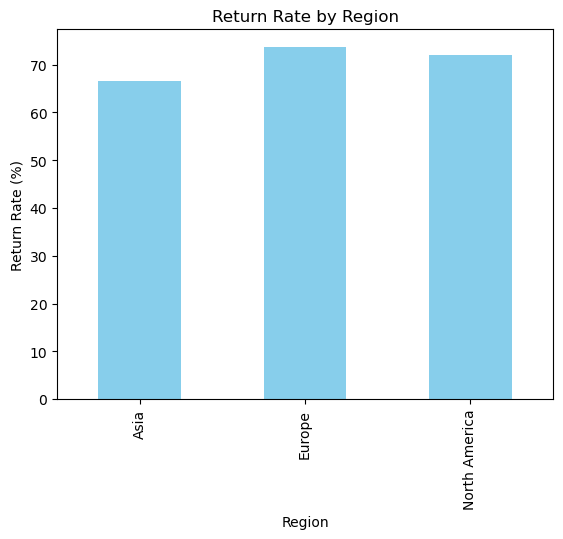

In [5]:
# Return rate by region
region_returns = data.groupby('Region')['ReturnID'].count() / data['Region'].value_counts() * 100
region_returns.plot(kind='bar', title='Return Rate by Region', color='skyblue')
plt.ylabel('Return Rate (%)')
plt.show()

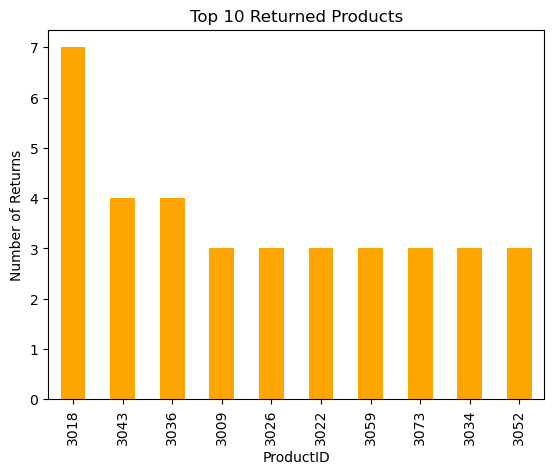

In [3]:
# Top products with high return rates
top_returns = data['ProductID'].value_counts().head(10)
top_returns.plot(kind='bar', title='Top 10 Returned Products', color='orange')
plt.ylabel('Number of Returns')
plt.show()

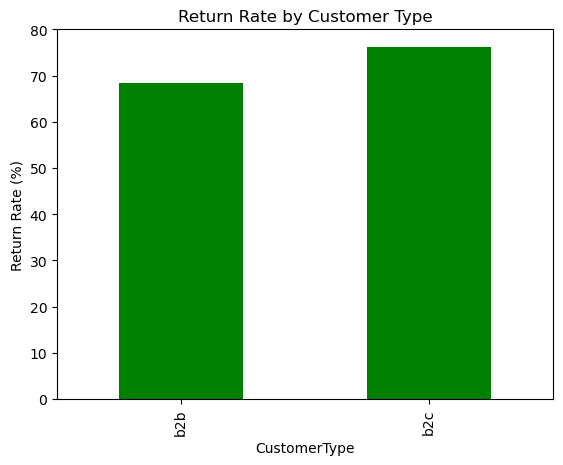

In [11]:
# Return behavior by customer type
customer_returns = data.groupby('CustomerType')['ReturnID'].count() / data['CustomerType'].value_counts() * 100
customer_returns.plot(kind='bar', title='Return Rate by Customer Type', color='green')
plt.ylabel('Return Rate (%)')
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [15]:

# Load cleaned data
data = pd.read_csv('cleaned_ecommerce_data.csv')

# Create target variable
data['Return_Flag'] = data['ReturnID'].notnull().astype(int)

# Select features and target
features = ['Region', 'Price', 'Quantity', 'CustomerType', 'DeliveryStatus']
X = pd.get_dummies(data[features], drop_first=True)
y = data['Return_Flag']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, 'return_prediction_model.pkl')
print("✅ Model Saved Successfully!")


Model Accuracy: 71.43%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.71      1.00      0.83        15

    accuracy                           0.71        21
   macro avg       0.36      0.50      0.42        21
weighted avg       0.51      0.71      0.60        21

✅ Model Saved Successfully!


C:\an\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\an\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\an\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
